# Support Vector Regression

### Library Import

In [1]:
import pandas as pd
import numpy as np

from models.utility import load_input, scale_with_minmax, get_dates_from_config, handle_outliers, get_params_from_config, dailydf_to_ts, inverse_transform_minmax, transform_dayofyear, split_dataframe 
from models.svr import SVReg
from models.deeplearner import DeepLearner

from solutil import evaluations

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

### Input Preparation

In [2]:
# Define global variables
str_model = 'inlet1_svr'

In [3]:
# Load Input Parameters
dates = get_dates_from_config(str_model)
df_variables = load_input(str_model=str_model, **dates)

base
base_1d
useday_1d
temp_1h
glob_1h
rain_1h
bf15_1h
schmelz_1h


In [4]:
# Generate day-of-year sin and cos
df_doy = transform_dayofyear(df_variables)

In [5]:
# Handle outliers
df_handled = handle_outliers(df_doy)

Variable base_lag0
Variable base_1d_lag1
Variable temp_1h_lag1
Variable glob_1h_lag1
Variable glob_1h_lag2
Variable rain_1h_lag1
Variable rain_1h_lag2
Variable bf15_1h_lag0
Variable bf15_1h_lag1
Variable bf15_1h_lag2
Variable schmelz_1h_lag1
Variable schmelz_1h_lag2
Variable schmelz_1h_lag3
Variable yearday_sin
Variable yearday_cos


In [6]:
# Scale inputs
df_scaled = scale_with_minmax(df_variables, str_model)

In [7]:
# Initialize SVReg class
svr = SVReg()

In [8]:
df_label, model_names = svr.build_model_input(df=df_scaled, target_var='base_lag0', str_model=str_model, n_offset=0)

In [9]:
# Train Test Split
x_train, x_test, y_train, y_test = split_dataframe(df_label, target_var=model_names)

### Model Initiation & Training

In [10]:
# Model 1
ylabel = 'y_model1'
y_train_i = y_train[ylabel]
y_test_i = y_test[ylabel]

In [11]:
y_train_i

2021-03-02 00:00:00+01:00    0.339328
2021-03-02 04:00:00+01:00    0.303646
2021-03-02 08:00:00+01:00    0.420746
2021-03-02 12:00:00+01:00    0.436386
2021-03-02 16:00:00+01:00    0.433634
                               ...   
2023-07-06 04:00:00+01:00    0.370832
2023-07-06 08:00:00+01:00    0.430731
2023-07-06 12:00:00+01:00    0.311001
2023-07-06 16:00:00+01:00    0.258464
2023-07-06 20:00:00+01:00    0.219939
Name: y_model1, Length: 4998, dtype: float64

#### Grid Search

In [12]:
# Define Grid Search hyperparameters
hyperparams = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
}

hyperparams_short = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2]
}

In [13]:
# Parameterize Grid Search
svreg = SVR()
grid_search = GridSearchCV(svreg, param_grid=hyperparams_short, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

##### Model 1

In [14]:
# Run Grid Search
#grid_results = grid_search.fit(x_train, y_train_i)

In [15]:
# Extract Best Hyperparameters
#best_params = grid_results.best_params_
#best_score = grid_results.best_score_

#print(f"Best parameter combination: {best_params} with score {best_score}")

##### Model 2

In [16]:
# Run Grid Search
# grid_results_2 = grid_search.fit(x_train, y_train['y_model2'])

In [17]:
# Extract Best Hyperparameters
#best_params_2 = grid_results_2.best_params_
#best_score_2 = grid_results_2.best_score_

#print(f"Best parameter combination: {best_params_2} with score {best_score_2}")

##### Model 3

In [18]:
# Run Grid Search
#grid_results_3 = grid_search.fit(x_train, y_train['y_model3'])

In [19]:
# Extract Best Hyperparameters
#best_params_3 = grid_results_3.best_params_
#best_score_3 = grid_results_3.best_score_

#print(f"Best parameter combination: {best_params_3} with score {best_score_3}")

##### Model 4

In [20]:
# Run Grid Search
#grid_results_4 = grid_search.fit(x_train, y_train['y_model4'])

In [21]:
# Extract Best Hyperparameters
#best_params_4 = grid_results_4.best_params_
#best_score_4 = grid_results_4.best_score_

#print(f"Best parameter combination: {best_params_4} with score {best_score_4}")

##### Model 5

In [22]:
# Run Grid Search
#grid_results_5 = grid_search.fit(x_train, y_train['y_model5'])

In [23]:
# Extract Best Hyperparameters
#best_params_5 = grid_results_5.best_params_
#best_score_5 = grid_results_5.best_score_

#print(f"Best parameter combination: {best_params_5} with score {best_score_5}")

##### Model 6

In [24]:
# Run Grid Search
#grid_results_6 = grid_search.fit(x_train, y_train['y_model6'])

In [25]:
# Extract Best Hyperparameters
#best_params_6 = grid_results_6.best_params_
#best_score_6 = grid_results_6.best_score_

#print(f"Best parameter combination: {best_params_6} with score {best_score_6}")

#### Optimum Model Initiation

In [26]:
# Generate and Parameterize Models
models = svr.build_svr(str_model='inlet1_svr')

In [27]:
# Train models
trained_models = svr.train_svr(svr_dict=models, x_train=x_train, y_train=y_train)

In [28]:
# Predict Time Series
y_pred = svr.predict_svr(trained_svr=trained_models, x_test=x_test, str_model='inlet1_svr')

In [29]:
# Rescale Predictions
y_pred_rescaled = inverse_transform_minmax(df_scaled=y_pred, str_model='inlet1_svr', attributes=['base_lag0']) # base_lag0 as foundation for y_model1, etc.
y_test_rescaled = inverse_transform_minmax(df_scaled=y_test['y_model1'], str_model='inlet1_svr', attributes=['base_lag0'])

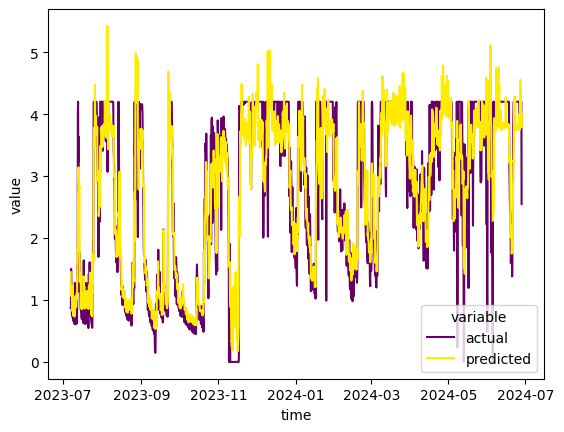

In [30]:
# Comparison Plot
fig = evaluations.get_act_vs_pred_plot(y_test_rescaled, y_pred_rescaled)

In [31]:
metrics = evaluations.get_eval_metrics(y_test_rescaled, y_pred_rescaled)
metrics

{'mae': 0.3913920982824978,
 'mse': 0.2942241994117369,
 'rmse': 0.5424243720665001,
 'mape': 66702978681807.266,
 'non-na%': 1.0,
 'n_actual_obs': 2143,
 'n_pred_nas': 0}

### Save Model Output for Ensemble

In [32]:
data_dict = {'ypred_svr': y_pred_rescaled,
            'ytest_svr': y_test_rescaled}

df_data = pd.DataFrame(data_dict)

df_data.to_csv('experiments/stacking_data/ypred_svr.csv')

PermissionError: [Errno 13] Permission denied: 'experiments/stacking_data/ypred_svr.csv'

In [ ]:
df_data

In [ ]:
df_variables[df_variables.index >= '2023-07-07 00:00:00+01:00'].head(10)